# Amazon Data 

Importing S&P 500 Data from [Amazon Stock Data]("https://www.kaggle.com/datasets/varpit94/amazon-stock-data") 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
import scipy.stats as stats

df = pd.read_csv('AMZN.csv')
df.head()

Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

    Average  
0  2.288194  
1  1.885417  
2  1.718750  
3  1.704861  
4  1.552083

Description of Data

In [2]:
df.describe

<bound method NDFrame.describe of             Date         Open         High          Low        Close  \
0     1997-05-15     2.437500     2.500000     1.927083     1.958333   
1     1997-05-16     1.968750     1.979167     1.708333     1.729167   
2     1997-05-19     1.760417     1.770833     1.625000     1.708333   
3     1997-05-20     1.729167     1.750000     1.635417     1.635417   
4     1997-05-21     1.635417     1.645833     1.375000     1.427083   
...          ...          ...          ...          ...          ...   
6252  2022-03-18  3136.260010  3231.879883  3120.219971  3225.010010   
6253  2022-03-21  3222.419922  3261.679932  3191.060059  3229.830078   
6254  2022-03-22  3236.110107  3323.340088  3233.979980  3297.780029   
6255  2022-03-23  3274.100098  3327.399902  3253.739990  3268.159912   
6256  2022-03-24  3274.989990  3282.370117  3201.000000  3272.989990   

        Adj Close    Volume  
0        1.958333  72156000  
1        1.729167  14700000  
2        1.

Check for Duplicates

In [3]:
duplicate_count = (df.duplicated() == True).sum()
print(f"There are {duplicate_count} duplicates")

There are 0 duplicates


Check for null values

In [4]:
df.isnull()

Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
6252  False  False  False  False  False      False   False
6253  False  False  False  False  False      False   False
6254  False  False  False  False  False      False   False
6255  False  False  False  False  False      False   False
6256  False  False  False  False  False      False   False

[6257 rows x 7 columns]

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The length of the data

In [6]:
df_length = len(df)

print (f"The length of our data frame is {df_length}")

The length of our data frame is 6257


Now to put the data into graphs

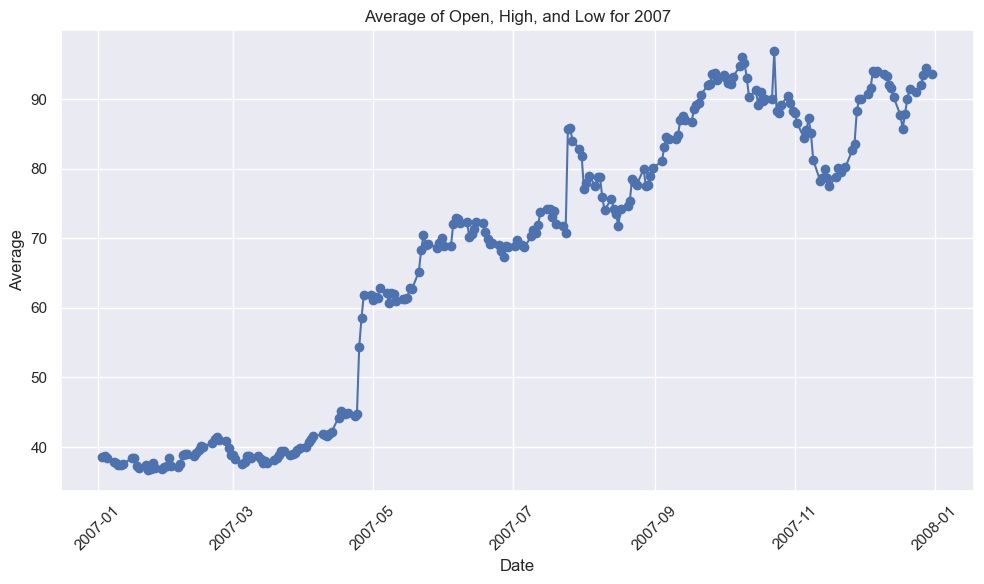

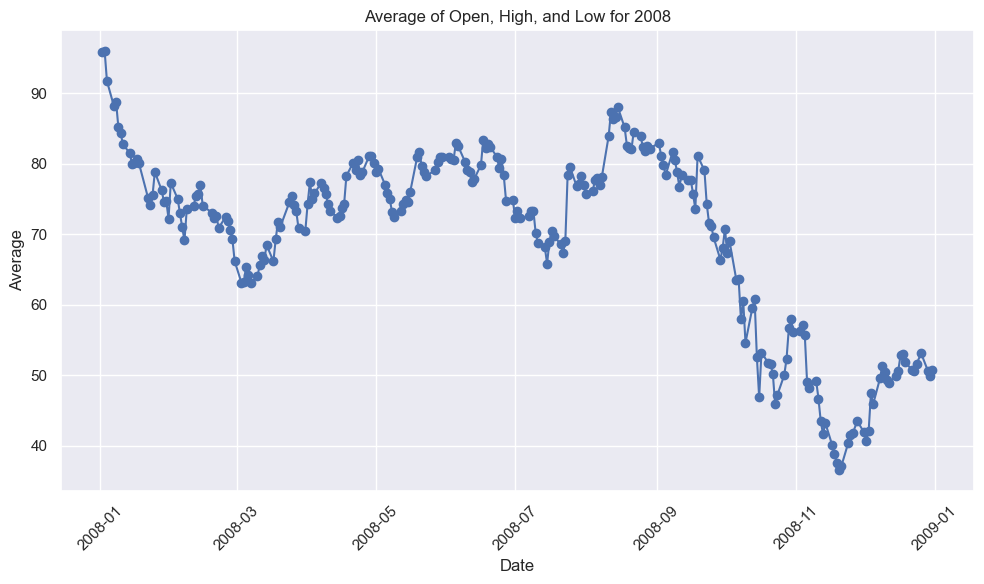

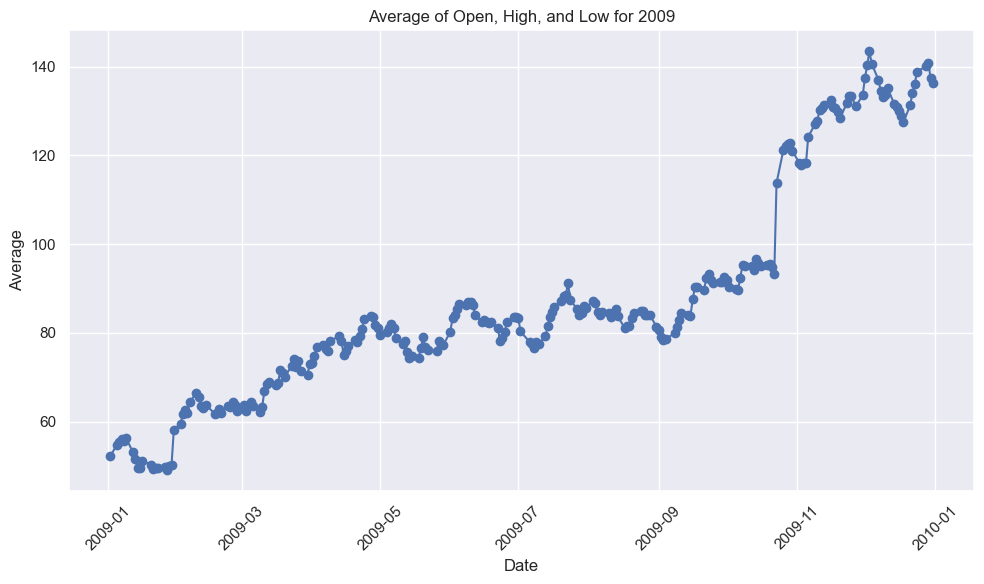

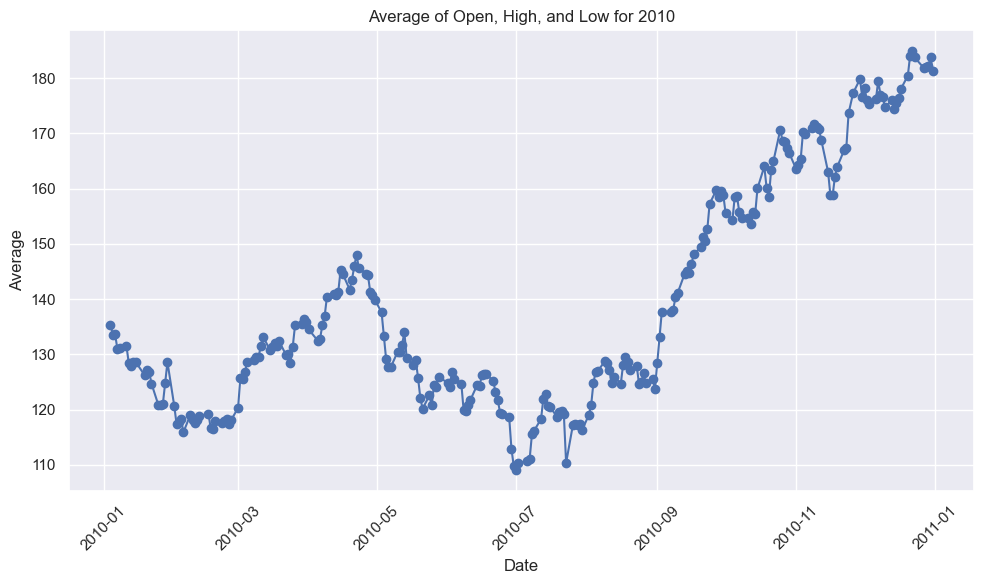

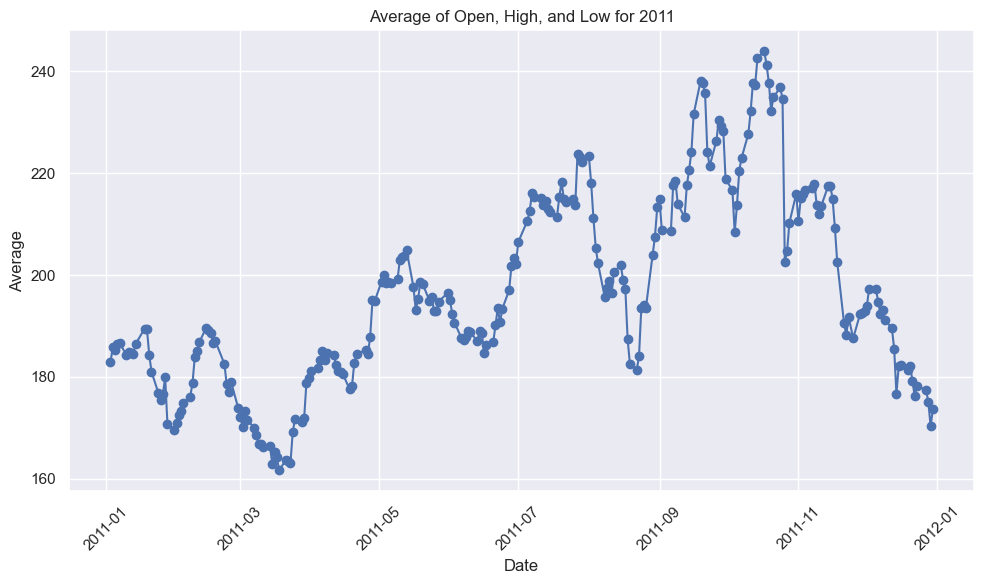

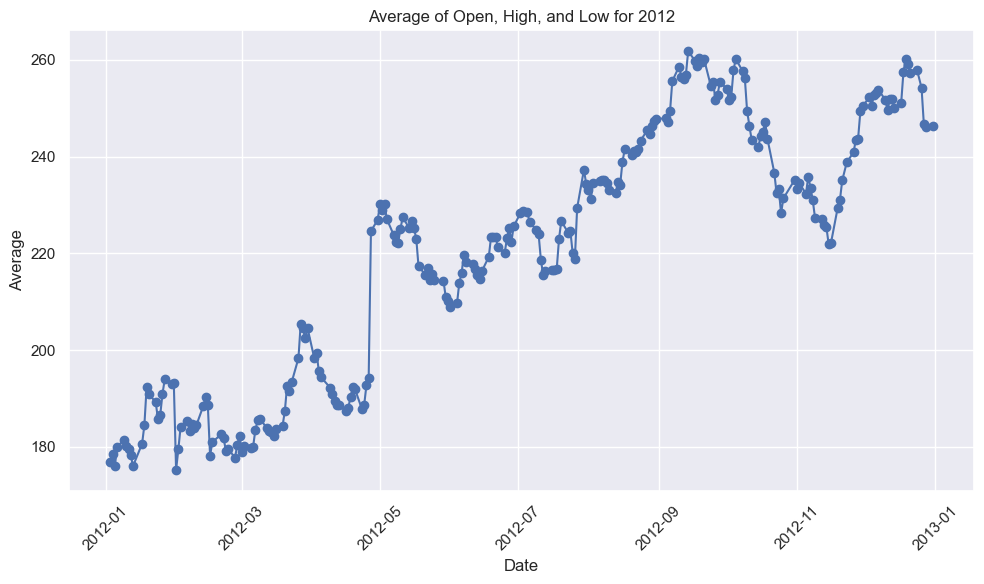

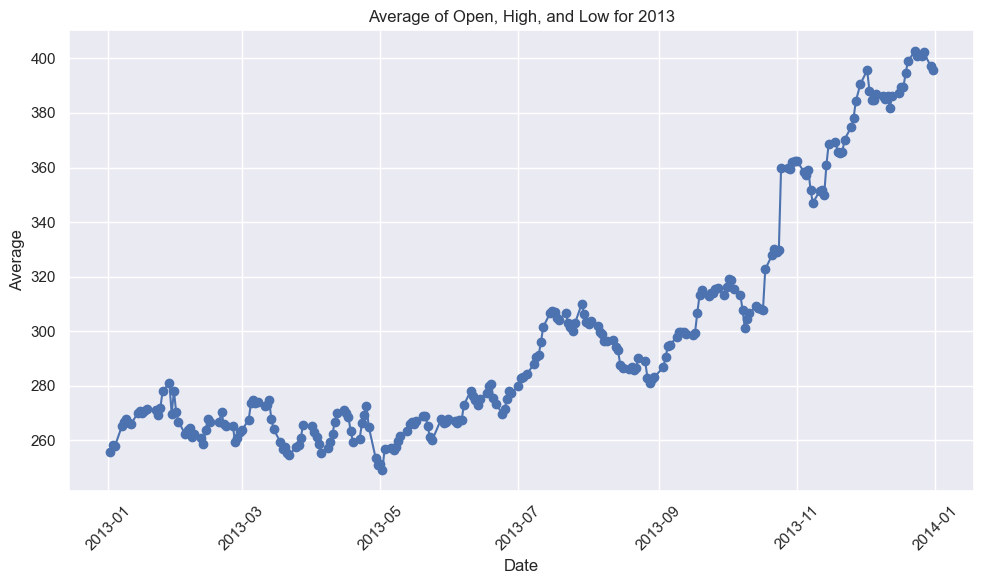

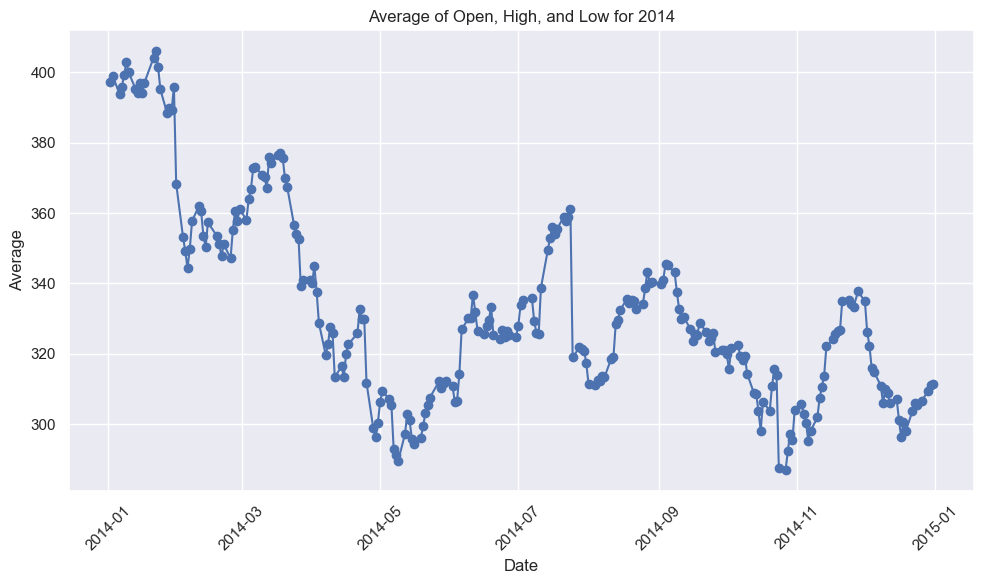

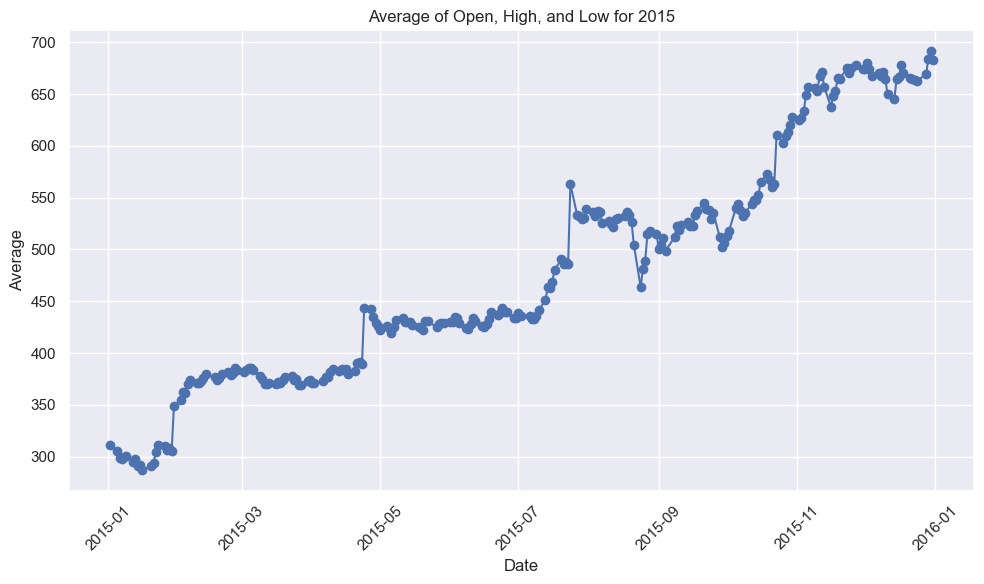

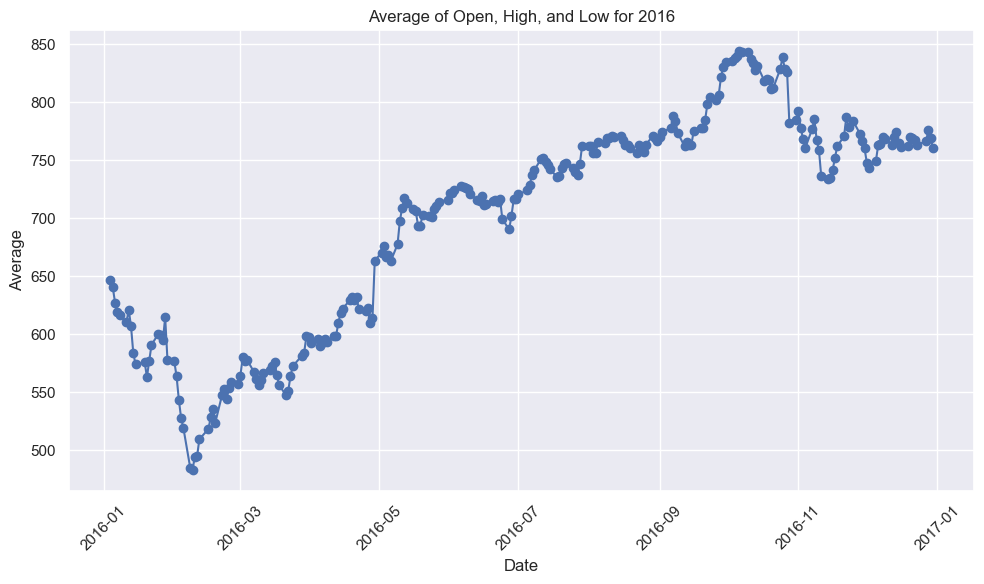

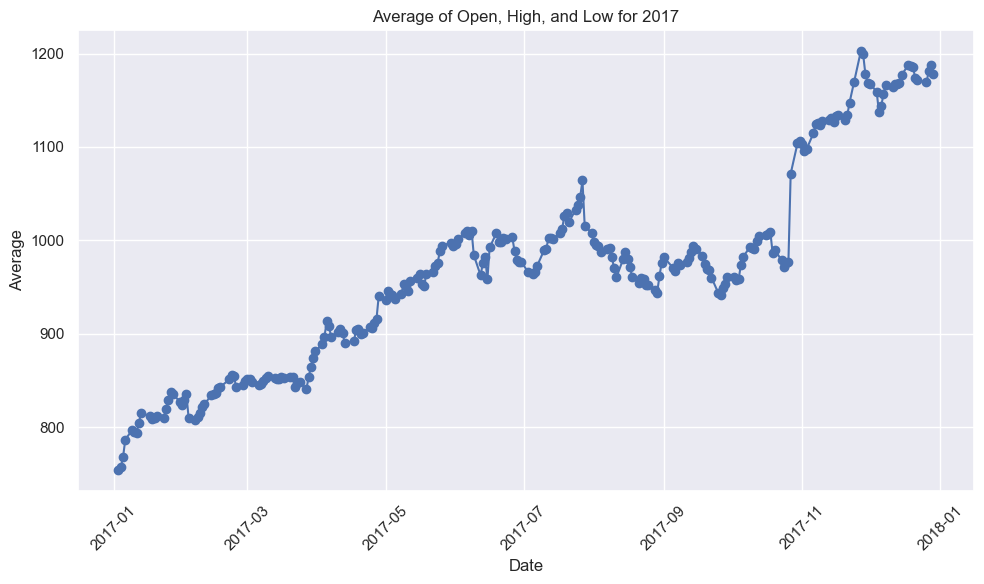

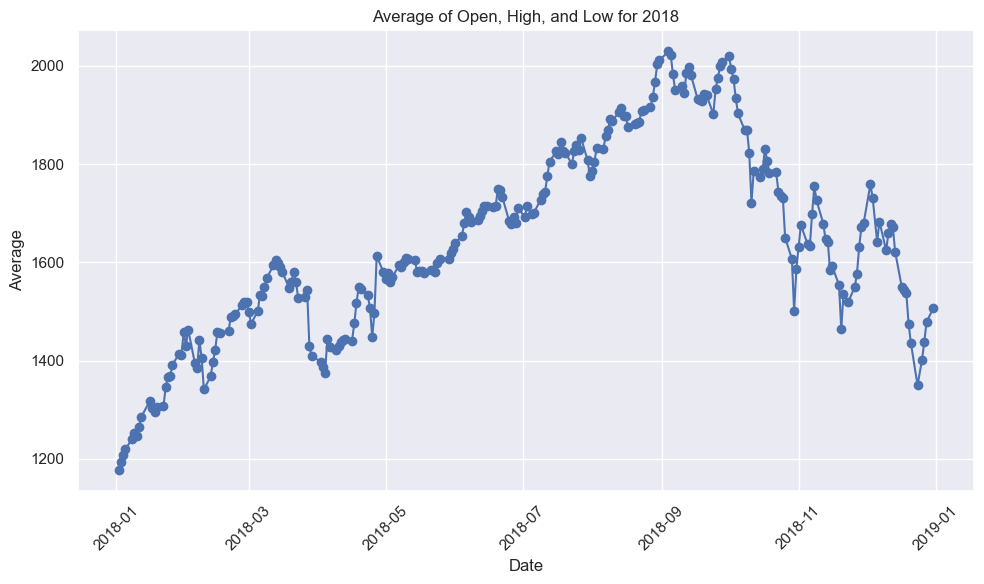

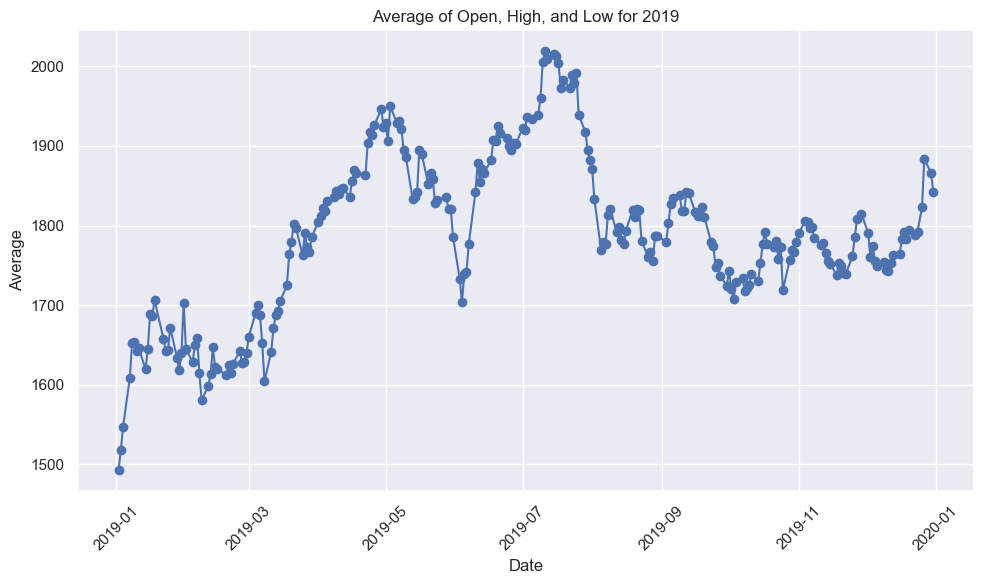

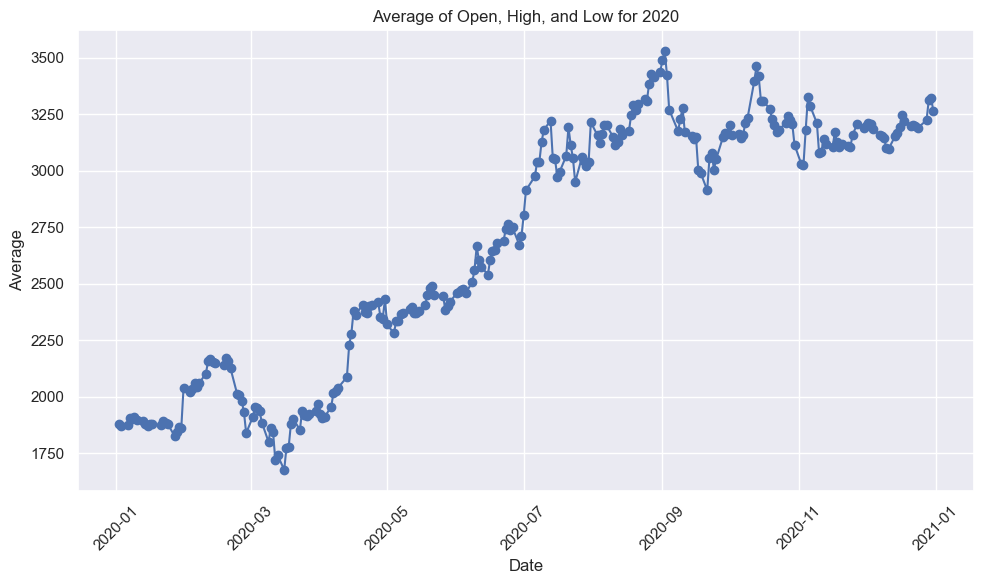

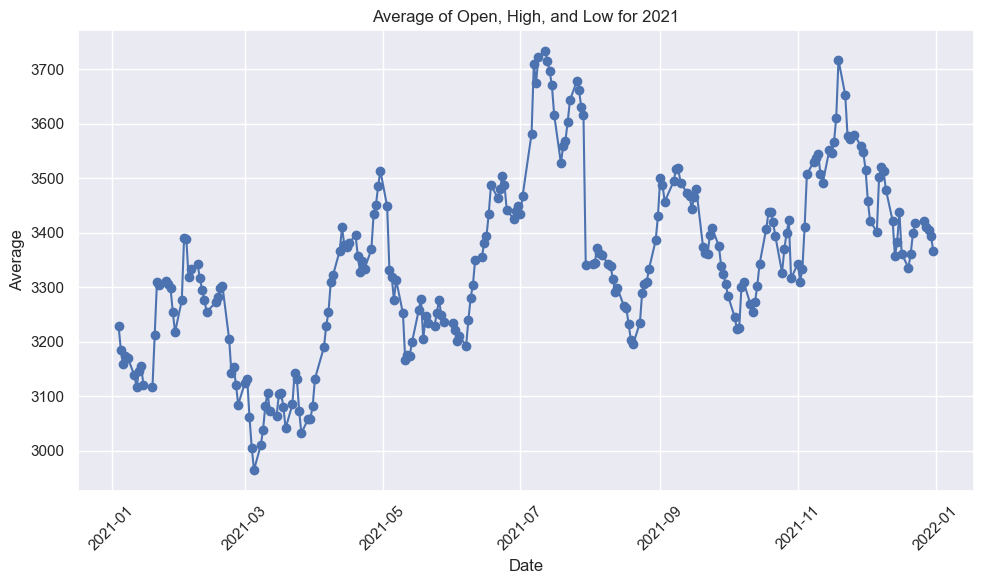

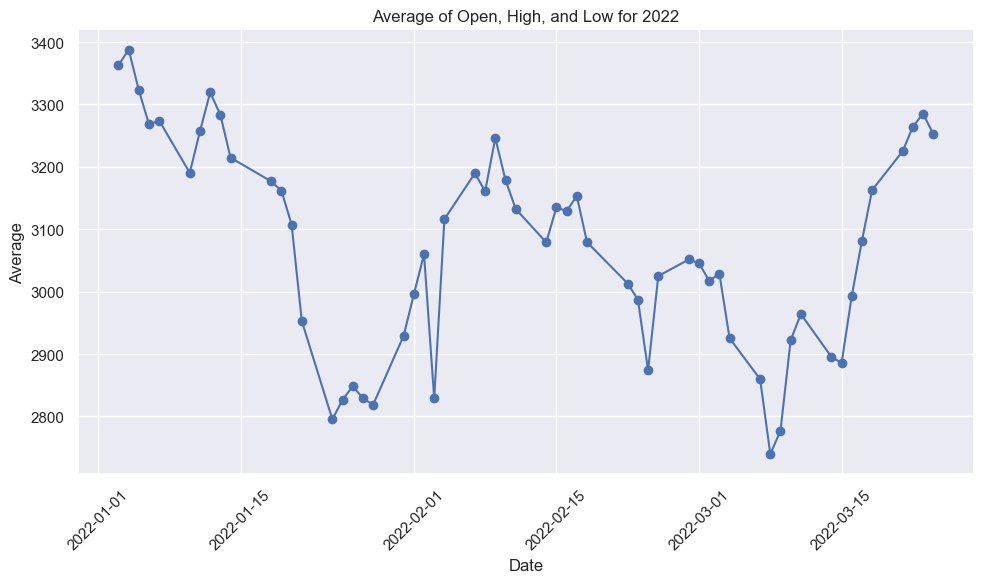

In [13]:
# Parse 'Date' column as datetime
df['Date'] = pd.to_datetime(df['Date'])

# Iterate over each year from 2007 to 2022
for year in range(2007, 2023):
    # Filter data for the current year
    df_year = df[df['Date'].dt.year == year]
    
    # Calculate the average of "Open", "High", and "Low" columns for the current year
    df.loc[df['Date'].dt.year == year, 'Average'] = (df_year['Open'] + df_year['High'] + df_year['Low']) / 3
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_year['Date'], df_year['Average'], marker='o', linestyle='-')
    plt.title(f'Average of Open, High, and Low for {year}')
    plt.xlabel('Date')
    plt.ylabel('Average')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Write the updated DataFrame back to the CSV file
df.to_csv('AMZN.csv', index=False)

Now to make it interactive

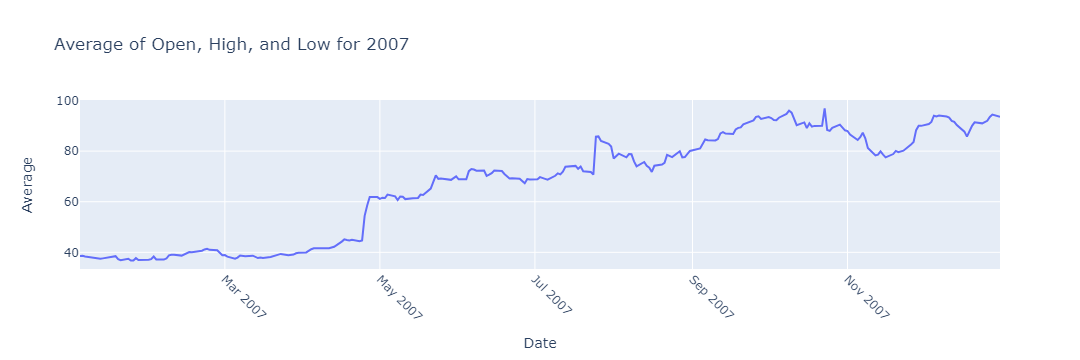

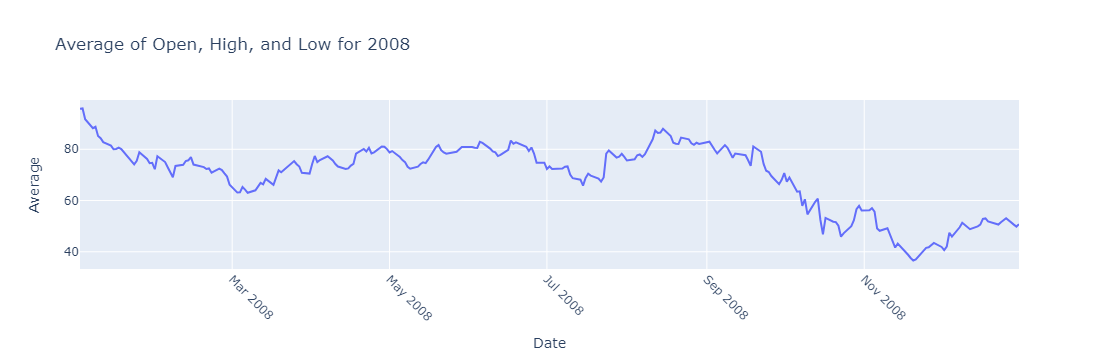

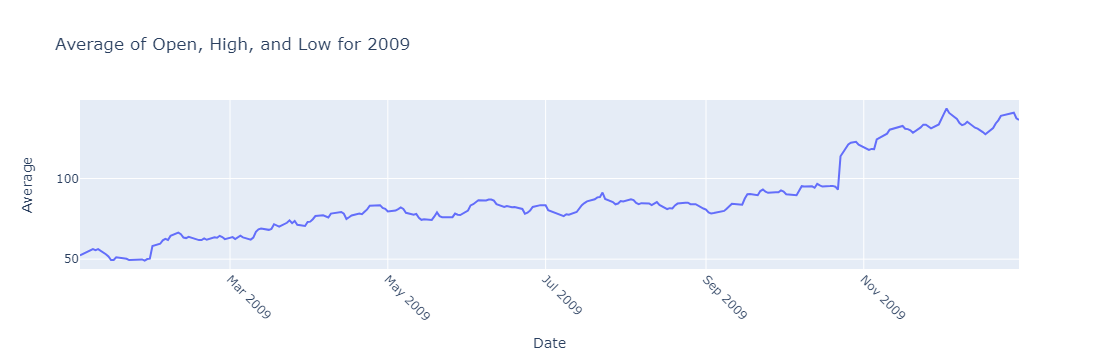

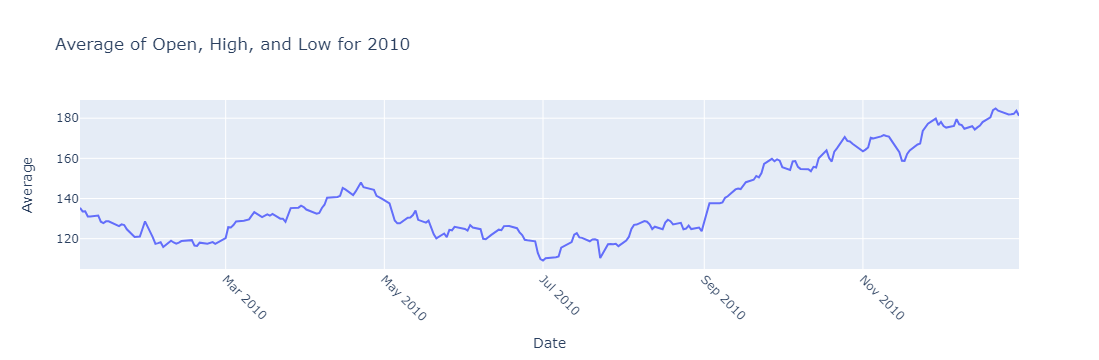

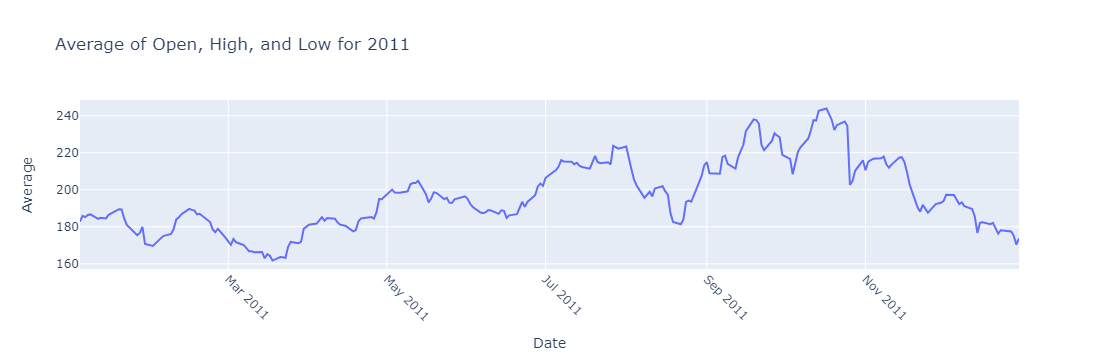

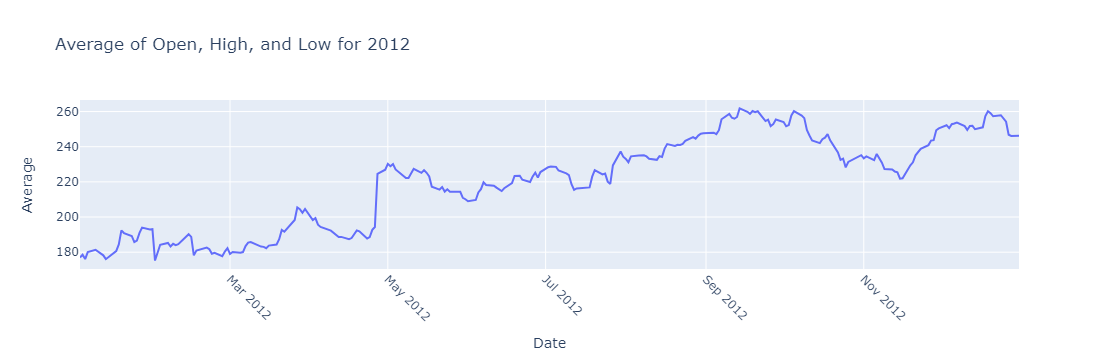

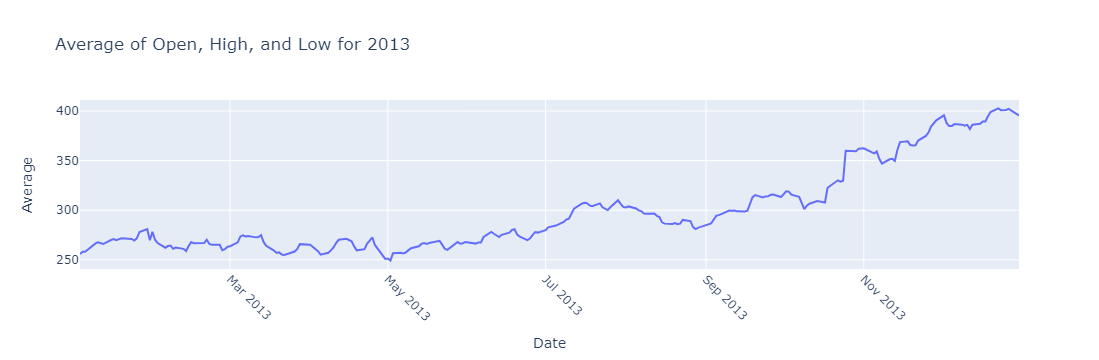

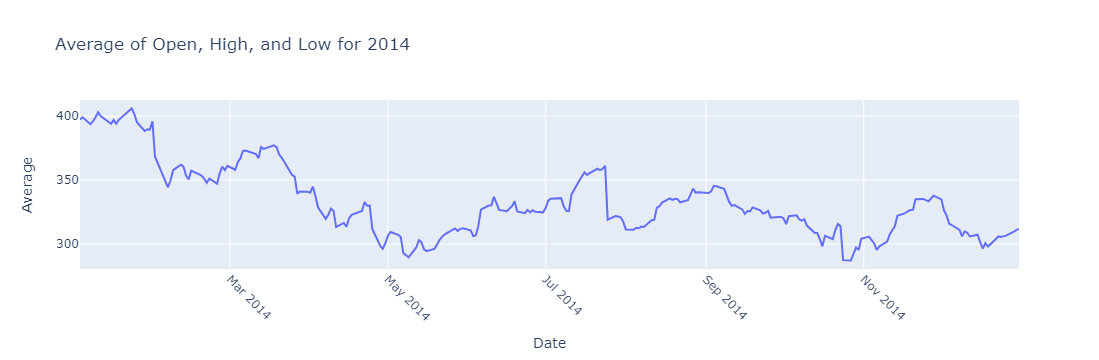

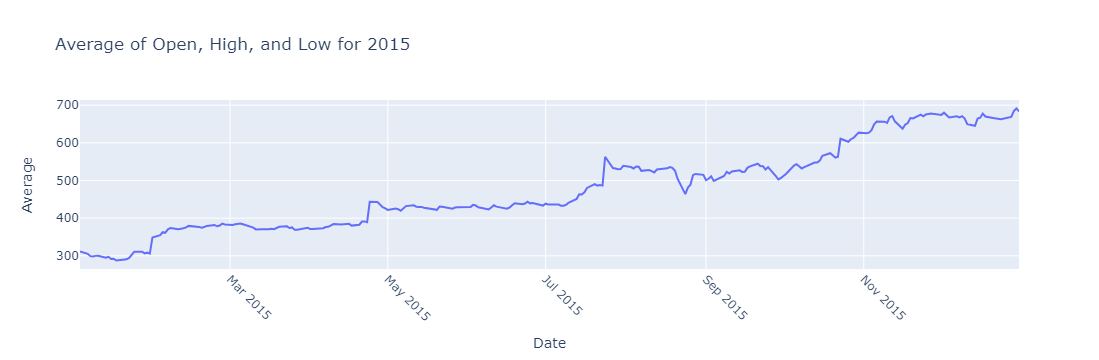

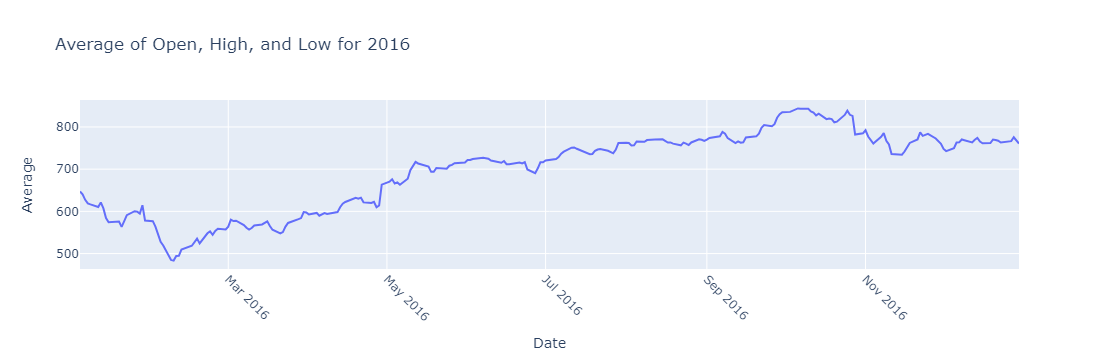

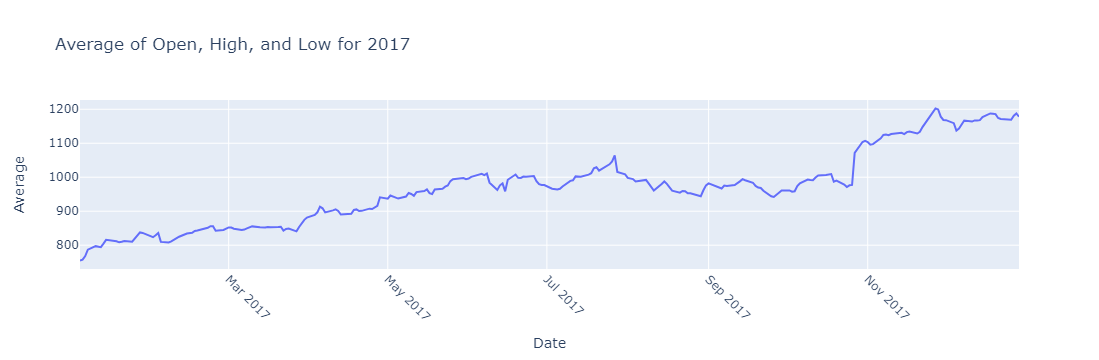

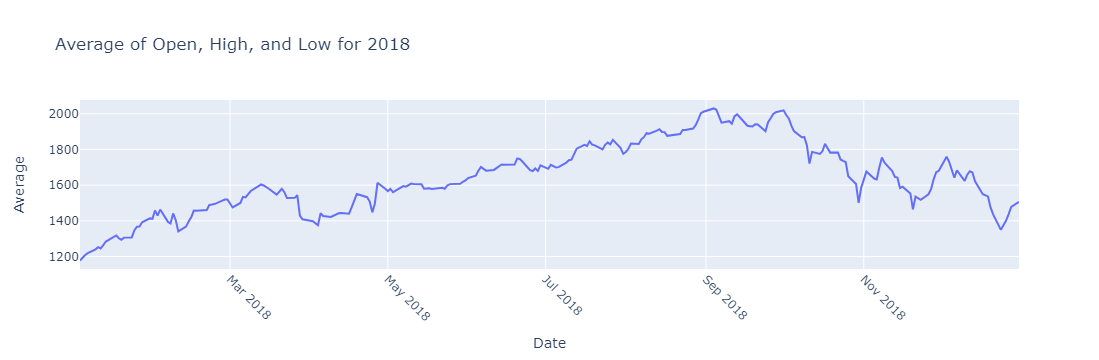

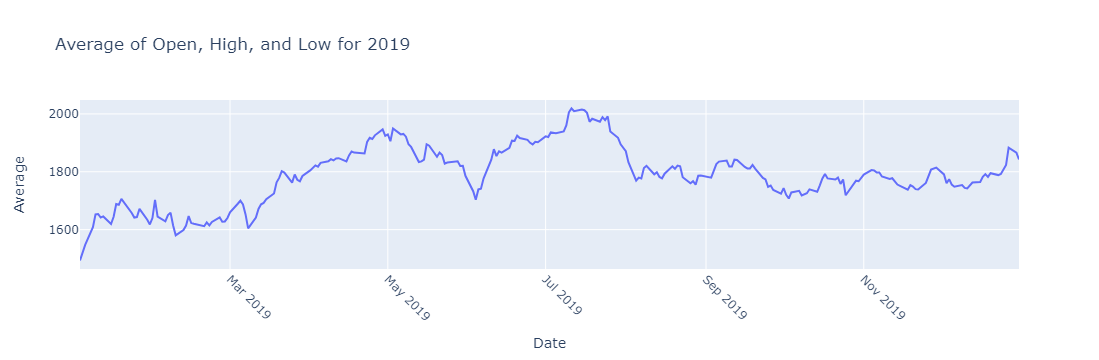

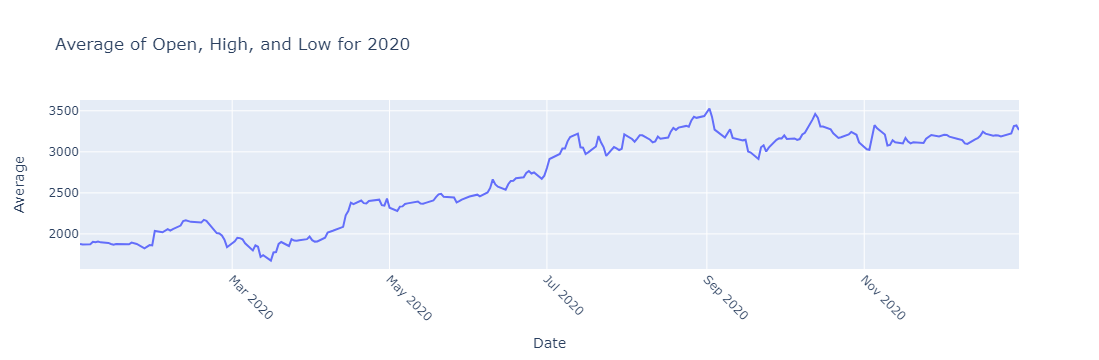

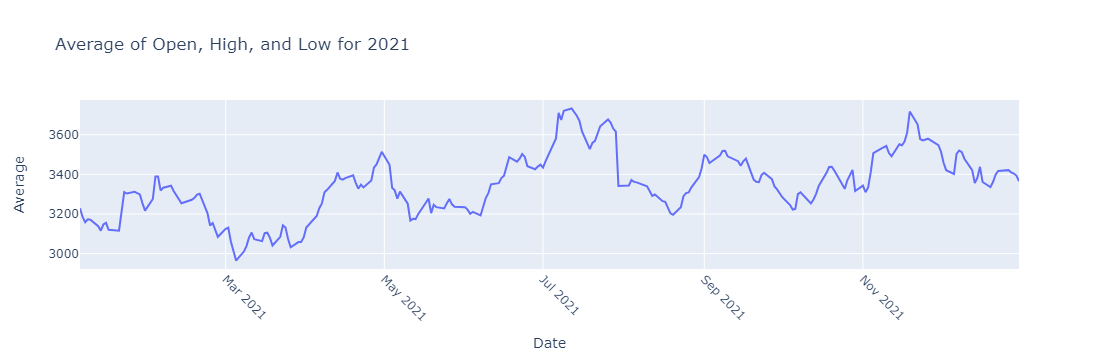

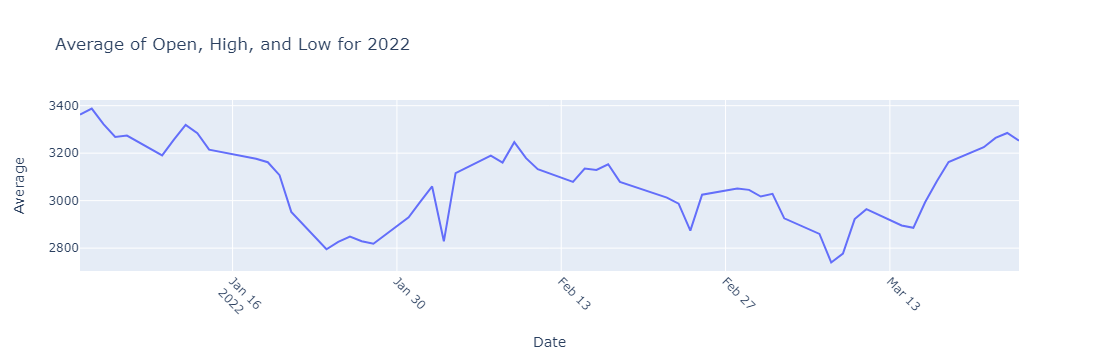

In [2]:
import pandas as pd
import plotly.express as px

# Read the CSV file into a DataFrame
df = pd.read_csv('AMZN.csv')

# Parse 'Date' column as datetime
df['Date'] = pd.to_datetime(df['Date'])

# Iterate over each year from 2007 to 2022
for year in range(2007, 2023):
    # Create a copy of the DataFrame to avoid the SettingWithCopyWarning
    df_year = df[df['Date'].dt.year == year].copy()
    
    # Calculate the average of "Open", "High", and "Low" columns for the current year
    df_year['Average'] = (df_year['Open'] + df_year['High'] + df_year['Low']) / 3
    
    # Add the average values as a new column to the original DataFrame
    df.loc[df['Date'].dt.year == year, 'Average'] = df_year['Average']

    # Plotting
    fig = px.line(df_year, x='Date', y='Average', title=f'Average of Open, High, and Low for {year}')
    fig.update_xaxes(title_text='Date', tickangle=45)
    fig.update_yaxes(title_text='Average')
    fig.show()

# Write the updated DataFrame back to the CSV file
df.to_csv('AMZN.csv', index=False)
